# Prediction Youtube Video Views Project
## by Team4

Data sets are downloaded from Kaggle website. We used video title, tags, channel subscriber count, channel performance and video length to predict views. For the model, we used Random Forest Regresssor as the AI model and TFid for vectorizing texts.

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, r2_score 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# Loading Dataset

In [2]:
df = pd.read_csv('youtube_trending_3_countries.csv', on_bad_lines='skip', low_memory=False)

df.head()

,video_id,video_published_at,video_trending__date,video_trending_country,channel_id,video_title,video_description,video_default_thumbnail,video_category_id,video_tags,...,channel_description,channel_custom_url,channel_published_at,channel_country,channel_view_count,channel_subscriber_count,channel_have_hidden_subscribers,channel_video_count,channel_localized_title,channel_localized_description
0,6YMY62tMLUA,2024-10-09T09:00:08Z,2024.10.12,United Arab Emirates,UCq-Fj5jknLsUf-MWSy4_brA,Bhool Bhulaiyaa 3 (Official Trailer): Kartik A...,Haveli Ka Darwaza Khula Ek baar Phir… Rooh Bab...,https://i.ytimg.com/vi/6YMY62tMLUA/default.jpg,Music,"tseries,tseries songs,bhool bhulaiyaa 3,bhool ...",...,"""Music can change the world"". T-Series is Indi...",@tseries,2006-03-13T14:27:05Z,India,2.693735e+11,276000000.0,False,21864.0,T-Series,"""Music can change the world"". T-Series is Indi..."
1,MD7v0-igVIM,2024-10-07T07:43:56Z,2024.10.12,United Arab Emirates,UCcXQd6kHKm0b41x8zMVMmMg,Singham Again | Official Trailer | A Rohit She...,Aa rahi aap ki favourite cop universe aapke sa...,https://i.ytimg.com/vi/MD7v0-igVIM/default.jpg,Entertainment,"singham again ajay devgn,singam 3 movie,singha...",...,Official Account of JioStudios\n\nwebsite : ht...,@jiostudios,2018-11-05T06:07:05Z,India,4.907153e+08,794000.0,False,623.0,JioStudios,Official Account of JioStudios\n\nwebsite : ht...
2,vMqML65MK6Q,2024-10-06T21:00:26Z,2024.10.12,United Arab Emirates,UCf-cpC9WAdOsas19JHipukA,HIGHLIGHTS | Brighton v Tottenham | Premier Le...,#brightonandhovealbion #tottenhamhotspur #pre...,https://i.ytimg.com/vi/vMqML65MK6Q/default.jpg,Sports,"Brighton,Hove,Albion,Premier league,Seagulls,a...",...,Welcome to the official YouTube channel for Br...,@officialbhafc,2013-07-29T09:55:10Z,United Kingdom,3.194925e+08,676000.0,False,5402.0,Official Brighton & Hove Albion FC,Welcome to the official YouTube channel for Br...
3,AzBz2Va2klU,2024-10-04T14:00:13Z,2024.10.12,United Arab Emirates,UCX5lX80yKjkzyXQWkkm3rOQ,حققت حلم ابني وسافرنا بلد كان نفسة يروحها,حققت حلم ابني وسافرنا بلد كان نفسة يروحها\n\nF...,https://i.ytimg.com/vi/AzBz2Va2klU/default.jpg,Entertainment,"kareem elsayed,kareem elsayed vlogs,diary of a...",...,أسمى كريم السيد.\nمصرى مقيم فى انجلترا.\nفى ال...,@kareemelsayedvlogs,2008-07-26T22:51:16Z,United Kingdom,1.719163e+08,1800000.0,False,432.0,Kareem Elsayed كريم السيد,أسمى كريم السيد.\nمصرى مقيم فى انجلترا.\nفى ال...
4,zxIIKdx61WA,2024-10-01T22:12:30Z,2024.10.12,United Arab Emirates,UC16niRr50-MSBwiO3YDb3RA,Iran threatens new “crushing attack” on Israel...,Iran has threatened to carry out a further “cr...,https://i.ytimg.com/vi/zxIIKdx61WA/default.jpg,News & Politics,"bbc,news,world,america,usa,Vengeance,revenge,L...",...,Welcome to the official BBC News YouTube chann...,@bbcnews,2006-04-08T05:51:05Z,United Kingdom,5.601219e+09,16800000.0,False,23175.0,BBC News,Welcome to the official BBC News YouTube chann...


In [4]:
df['channel_country'].unique()

array(['India', 'United Kingdom', 'Spain'], dtype=object)

In [3]:
print(len(df))

449791


In [4]:
print(df.columns)

Index(['video_id', 'video_published_at', 'video_trending__date',
       'video_trending_country', 'channel_id', 'video_title',
       'video_description', 'video_default_thumbnail', 'video_category_id',
       'video_tags', 'video_duration', 'video_dimension', 'video_definition',
       'video_licensed_content', 'video_view_count', 'video_like_count',
       'video_comment_count', 'channel_title', 'channel_description',
       'channel_custom_url', 'channel_published_at', 'channel_country',
       'channel_view_count', 'channel_subscriber_count',
       'channel_have_hidden_subscribers', 'channel_video_count',
       'channel_localized_title', 'channel_localized_description'],
      dtype='object')



# Preprocessing and Feature Engineering

In [5]:
df = df[['video_title', 
         'video_category_id',
         'video_tags', 
         'video_duration', 
         'video_view_count',
         'channel_view_count', 
         'channel_subscriber_count', 
         'channel_video_count']].dropna()
len(df)

346533

### Converting category strings into numeric values

In [6]:
print(df['video_category_id'].unique())

['Music' 'Entertainment' 'Sports' 'News & Politics' 'People & Blogs'
 'Autos & Vehicles' 'Film & Animation' 'Education' 'Gaming' 'Comedy'
 'Travel & Events' 'Howto & Style' 'Science & Technology' 'Pets & Animals']


In [7]:
CATEGORY_MAP = {
    "Film & Animation": 1,
    "Autos & Vehicles": 2,
    "Music": 10,
    "Pets & Animals": 15,
    "Sports": 17,
    "Travel & Events": 19,
    "Gaming": 20,
    "People & Blogs": 22,
    "Comedy": 23,
    "Entertainment": 24,
    "News & Politics": 25,
    "Howto & Style": 26,
    "Education": 27,
    "Science & Technology": 28
}

In [8]:
def clean_category(category):
    if pd.isna(category):
        return 0
    s = str(category).strip().lower()
    return CATEGORY_MAP.get(s, 0)


In [9]:
df['video_category_id'] = df['video_category_id'].apply(clean_category)

### Feature Engineering for Duration (turning the strings into seconds)

In [10]:
def parse_duration(duration_str):
    if pd.isna(duration_str): return 0
    if isinstance(duration_str, (int, float)): return duration_str 
    try:
        h = re.search(r'(\d+)H', str(duration_str))
        m = re.search(r'(\d+)M', str(duration_str))
        s = re.search(r'(\d+)S', str(duration_str))
        hours = int(h.group(1)) if h else 0
        mins = int(m.group(1)) if m else 0
        secs = int(s.group(1)) if s else 0
        return (hours * 3600) + (mins * 60) + secs
    except:
        return 0

In [11]:
df['duration'] = df['video_duration'].apply(parse_duration)

### Adding New Feature Average Performance of the Channel

In [12]:
df['prev_channel_views'] = df['channel_view_count'] - df['video_view_count']
df['prev_video_count'] = (df['channel_video_count'] - 1).clip(lower=1)
df['avg_performance'] = (df['prev_channel_views'] / df['prev_video_count']).clip(lower=0)

## Log-transfrom on view, subscriber count, avg performace for better performace

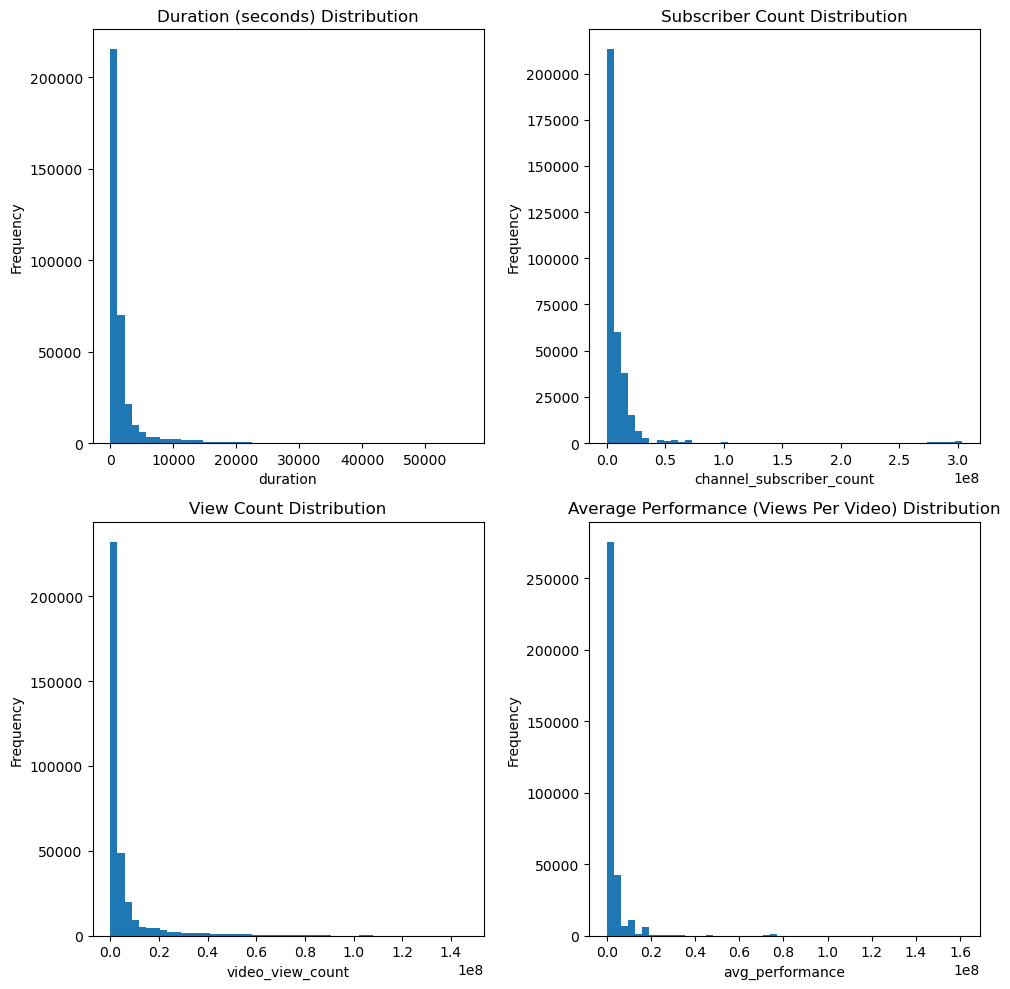

In [16]:
import matplotlib.pyplot as plt

columns_to_plot = [
    ("duration", "Duration (seconds)"),
    ("channel_subscriber_count", "Subscriber Count"),
    ("video_view_count", "View Count"),
    ("avg_performance", "Average Performance (Views Per Video)")
]

plt.figure(figsize=(10, 10))

for i, (col, title) in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=50)
    plt.title(f"{title} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


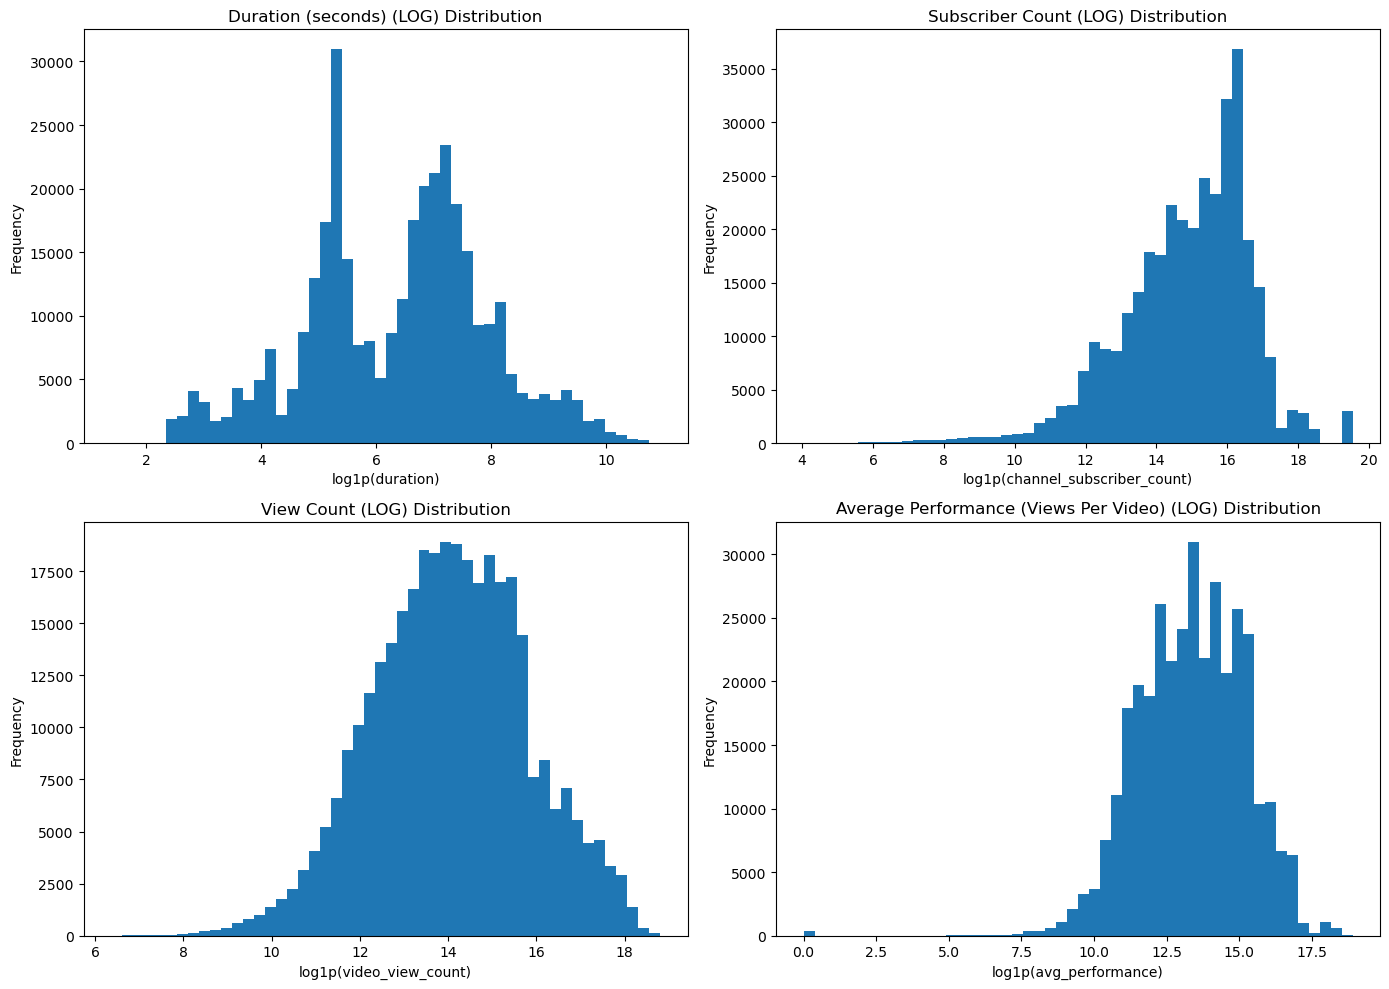

In [17]:
plt.figure(figsize=(14, 10))

for i, (col, title) in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.hist(np.log1p(df[col]), bins=50)
    plt.title(f"{title} (LOG) Distribution")
    plt.xlabel("log1p(" + col + ")")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [18]:
df['log_views'] = np.log1p(df['video_view_count'])
df['log_avg_performance'] = np.log1p(df['avg_performance'])
df['log_subs'] = np.log1p(df['channel_subscriber_count'])
df['log_duration'] = np.log1p(df['duration'])

# Training

### Decreasing the size of dataset

In [19]:
if len(df) > 20000:
    df = df.head(20000)

### Vectorizing titles and tags

In [20]:
tfidf_title = TfidfVectorizer(
    max_features=200,
    stop_words='english',
    max_df=0.3
)
title_features = tfidf_title.fit_transform(df['video_title'].astype(str))

tfidf_tags = TfidfVectorizer(
    max_features=200,
    stop_words='english',
    max_df=0.3
)
tag_features = tfidf_tags.fit_transform(df['video_tags'].astype(str))


In [21]:
numerical_features = df[[
    'video_category_id', 
    'log_avg_performance', 
    'log_duration',
    'log_subs'
]].astype(float).values

In [22]:
X = hstack([title_features, tag_features, numerical_features])
y = df['log_views'].astype(float)

### Splitting into train and test set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Training and testing 

In [24]:
model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [25]:
print(model.score(X_train, y_train))

0.9973310866695837


In [26]:
print(model.score(X_test, y_test ))

0.9815876423589792


In [27]:
log_pred = model.predict(X_test)
y_pred = np.expm1(log_pred)

y_true = np.expm1(y_test) 

mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Mean Absolute Error: {int(mae):,} views")
print(f"Accuracy Score (R2): {r2:.3f}")

Mean Absolute Error: 91,317 views
Accuracy Score (R2): 0.997


## Calculating feature importances

In [28]:
title_feature_names = [f"title_{w}" for w in tfidf_title.get_feature_names_out()]
tag_feature_names   = [f"tag_{w}" for w in tfidf_tags.get_feature_names_out()]


# 2. Create list of numeric feature names
numeric_feature_names = [
    'video_category_id',
    'log_avg_performance',
    'log_duration',
    'log_subs'
]

# 3. Combine them into a single list
all_feature_names = (
    title_feature_names +
    tag_feature_names +
    numeric_feature_names
)

importances = model.feature_importances_

fi_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
})

fi_df = fi_df.sort_values(by='importance', ascending=False)


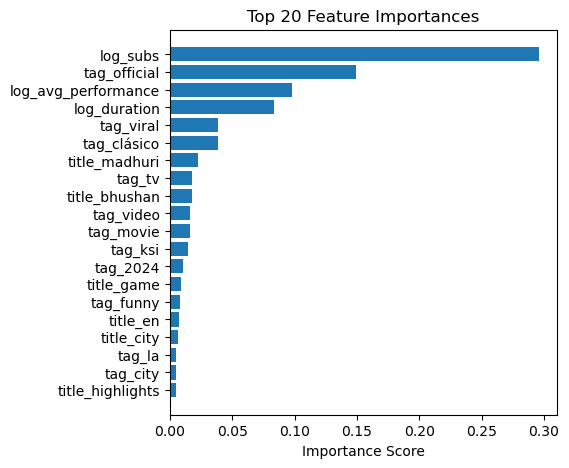

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.barh(fi_df.head(20)['feature'], fi_df.head(20)['importance'])
plt.gca().invert_yaxis() 
plt.xlabel("Importance Score")
plt.title("Top 20 Feature Importances")
plt.show()

### Prediciting from User Input

In [30]:
def time_to_seconds(time_str):

    user_input = time_str.strip().split(":")

    user_input = list(reversed(user_input))

    try:
        seconds = int(user_input[0])
        minutes = int(user_input[1]) if len(user_input) > 1 else 0
        hours = int(user_input[2]) if len(user_input) > 2 else 0
    except ValueError:
        raise ValueError(f"Invalid time format: {time_str}")

    return hours * 3600 + minutes * 60 + seconds

In [37]:
title = input("Title: ")
tags = input("Tags: ")
            
cat_in = input(f"Category ({list(CATEGORY_MAP.keys())[:]}...): ").lower().strip()
cat_id = float(CATEGORY_MAP.get(cat_in, 0))

duration = input("Duration (HH:MM:SS or MM:SS): ")
subs = float(input("Subscribers: "))
ch_views = float(input("Channel Total Views: "))
ch_vids = float(input("Channel Total Videos: "))
            
avg_perf = ch_views / (ch_vids + 1)

log_subs = np.log1p(subs)
log_avg_perf = np.log1p(avg_perf)
duration_sec = time_to_seconds(duration)
log_duration = np.log1p(duration_sec)
            
title_vec = tfidf_title.transform([title])
tag_vec = tfidf_tags.transform([tags])

num_vec = np.array([[cat_id, log_avg_perf, log_duration, log_subs]])
            
final_input = hstack([title_vec,tag_vec, num_vec])
log_pred = model.predict(final_input)[0]

pred_views = np.expm1(log_pred)
            
print(f"\n>>> PREDICTED VIEWS: {int(pred_views):,}")

Title:  WINE Course in Bangkok University | Winery Tour at Khaoyai | Wine Connection Survey
Tags: 
Category (['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Travel & Events', 'Gaming', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology']...): People & Blogs
Duration (HH:MM:SS or MM:SS): 6:33
Subscribers: 89
Channel Total Views: 2405
Channel Total Videos: 14

>>> PREDICTED VIEWS: 136,893
